In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow import keras


In [2]:

np.random.seed(42)
data_size = 1000
df = pd.DataFrame({
    'file_size': np.random.randint(200, 50000, data_size),
    'entropy': np.random.uniform(2, 8, data_size),
    'api_calls': np.random.randint(10, 300, data_size),
    'registry_modifications': np.random.randint(0, 50, data_size),
    'label': np.random.choice([0, 1], data_size, p=[0.6, 0.4])
})

print("Sample Data:")
print(df.head())


Sample Data:
   file_size   entropy  api_calls  registry_modifications  label
0      15995  3.466119        163                      22      0
1       1060  4.989486        205                       8      0
2      38358  3.982091        271                      33      0
3      44932  7.602151        152                      45      0
4      11484  2.045206        110                      13      0


In [3]:


X = df.drop('label', axis=1)
y = df['label']

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:

# SECTION 4: Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))



Random Forest Accuracy: 0.5409836065573771


In [5]:

# SECTION 5: Deep Neural Network (DNN)
model = keras.Sequential([
    keras.layers.Dense(16, input_dim=X_train_scaled.shape[1], activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=10, batch_size=16, verbose=1)
loss, acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print("DNN Accuracy:", acc)


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4825 - loss: 0.7027
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5229 - loss: 0.6946
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5194 - loss: 0.6990
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5567 - loss: 0.6871
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5429 - loss: 0.6912
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5179 - loss: 0.6921
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5746 - loss: 0.6835
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5392 - loss: 0.6895
Epoch 9/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5256 - loss: 0.6942
Epoch 10/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5449 - loss: 0.6905
DNN Accuracy: 0.4959016442298889


In [6]:

# SECTION 6: Ensemble Prediction
pred_rf_prob = rf.predict_proba(X_test_scaled)[:, 1]
pred_dnn_prob = model.predict(X_test_scaled).flatten()
ensemble_prob = (pred_rf_prob + pred_dnn_prob) / 2
ensemble_pred = (ensemble_prob > 0.5).astype(int)

acc_ensemble = accuracy_score(y_test, ensemble_pred)
print("\nFinal Ensemble Accuracy:", round(acc_ensemble * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, ensemble_pred))


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

Final Ensemble Accuracy: 54.92 %

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.48      0.52       126
           1       0.53      0.63      0.57       118

    accuracy                           0.55       244
   macro avg       0.55      0.55      0.55       244
weighted avg       0.55      0.55      0.55       244



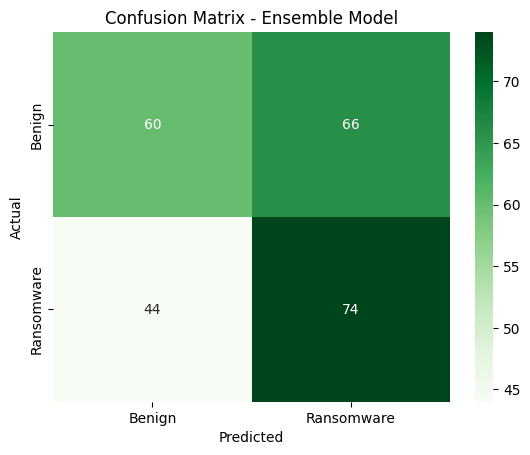

In [7]:

# SECTION 7: Confusion Matrix Visualization

cm = confusion_matrix(y_test, ensemble_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Benign', 'Ransomware'],
            yticklabels=['Benign', 'Ransomware'])
plt.title("Confusion Matrix - Ensemble Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [10]:

# SECTION 8: Save Results

import os
os.makedirs('results', exist_ok=True)

results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': ensemble_pred,
    'Probability': ensemble_prob
})
results.to_csv('results/ensemble_results.csv', index=False)
print("\nResults saved to results/ensemble_results.csv")




Results saved to results/ensemble_results.csv
